## Modelos de Clasificación

## Clustering - K-Means

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. 

### Preprocesamiento de Datos

In [34]:
import pandas as pd
df = pd.read_parquet('Data/data_cleaned.parquet')

In [35]:
df.head()

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLANTICO,BARRANQUILLA (CT),ARMA BLANCA,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACA,DUITAMA,ARMA BLANCA,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETA,PUERTO RICO,ARMA BLANCA,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,ARMA BLANCA,2010-01-01,FEMENINO,ADULTOS,1
4,SANTAFE DE BOGOTA D.C,BOGOTÁ D.C. (CT),ARMA BLANCA,2010-01-01,FEMENINO,ADULTOS,1


In [36]:
df_enc = df.copy()

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {
    "armas_medios": LabelEncoder(),
    "genero": LabelEncoder(),
    "grupo_etario": LabelEncoder(),
    "departamento": LabelEncoder(),
    "municipio": LabelEncoder(),   
}

for col, encoder in label_encoders.items():
    df_enc[col] = encoder.fit_transform(df_enc[col])

# Normalización de la columna 'cantidad'
scaler = StandardScaler()
df_enc['cantidad_scaled'] = scaler.fit_transform(df_enc[['cantidad']])

Clustering con K-means y Evaluación con Score Silhouette

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

features_for_clustering = ['armas_medios', 'genero', 'grupo_etario', 'departamento', 'municipio', 'cantidad_scaled']
kmeans = KMeans(n_clusters=3, random_state=42)
df_enc['cluster'] = kmeans.fit_predict(df_enc[features_for_clustering])

In [39]:
df_enc.head(), np.unique(cluster, return_counts=True)

(   departamento  municipio  armas_medios fecha_hecho  genero  grupo_etario  \
 0             4         83             0  2010-01-01       1             1   
 1             6        257             0  2010-01-01       0             1   
 2             8        668             0  2010-01-01       1             1   
 3             9        498             0  2010-01-01       0             1   
 4            26         99             0  2010-01-01       0             1   
 
    cantidad  cantidad_scaled  cluster  
 0         1        -0.329744        1  
 1         1        -0.329744        1  
 2         1        -0.329744        0  
 3         1        -0.329744        0  
 4         1        -0.329744        1  ,
 (array([0, 1, 2]), array([ 23168,  96667, 452244], dtype=int64)))

### Cálculo del Silhouette Score

In [48]:
silhouette_avg = silhouette_score(df_enc[features_for_clustering], df_enc['cluster'])
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.6427351608812863


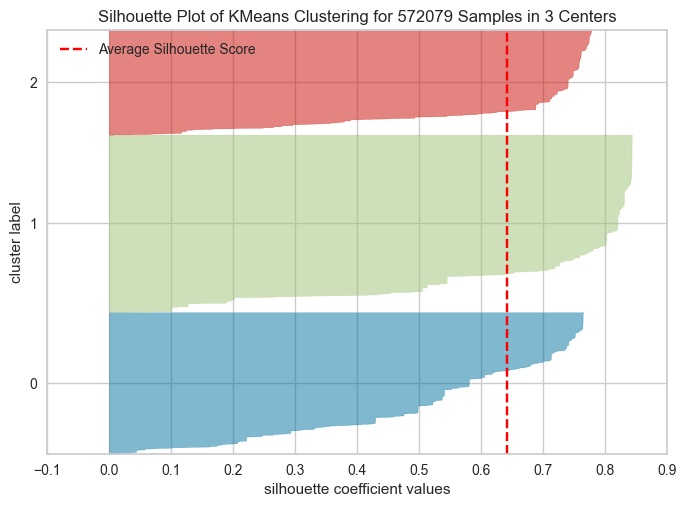

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 572079 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=3))

In [58]:
from yellowbrick.cluster import silhouette_visualizer
df_enc2 = df_enc.drop(['cluster','fecha_hecho'],axis=1)
silhouette_visualizer(KMeans(3),df_enc2,colors="yellowbrick")

### Análisis de los Centros de Clusters

In [40]:
cluster_centers = kmeans.cluster_centers_
print("Centros de los clusters:")
print(cluster_centers)

Centros de los clusters:
[[ 1.25515259e+00  2.30537028e-01  9.94048513e-01  1.52091814e+01
   5.14090441e+02 -4.83755342e-02]
 [ 1.57259968e+00  2.65417684e-01  1.00549509e+00  1.89005373e+01
   1.48608101e+02  1.19441335e-01]
 [ 1.37336889e+00  2.03555556e-01  9.90407111e-01  1.45484942e+01
   8.72437732e+02 -1.43888022e-01]]


* Armas_medios: Valores más altos pueden indicar una mayor frecuencia o diversidad de armas utilizadas, lo cual podría ser un indicativo de mayor riesgo.
* Grupo_etario: Valores más altos en esta variable podrían indicar la participación de grupos etarios considerados en mayor riesgo o vulnerabilidad.
* Cantidad_scaled: Un valor más alto en esta variable indica una mayor gravedad o frecuencia de los incidentes.

Asignación de Riesgo Basado en las Variables:

* Cluster 0: Tiene valores moderados en armas_medios y grupo_etario, y un valor ligeramente negativo en cantidad_scaled. Podría ser considerado de riesgo moderado.
* Cluster 1: Muestra los valores más altos en armas_medios y grupo_etario, y también el valor más alto en cantidad_scaled. Este debería ser clasificado claramente como de riesgo alto.
* Cluster 2: Presenta el valor más bajo en cantidad_scaled y valores moderados a bajos en armas_medios y grupo_etario. Este puede ser considerado de riesgo bajo.

In [41]:
df['cluster'] = df_enc['cluster']
df.head()

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,cantidad,cluster
0,ATLANTICO,BARRANQUILLA (CT),ARMA BLANCA,2010-01-01,MASCULINO,ADULTOS,1,1
1,BOYACA,DUITAMA,ARMA BLANCA,2010-01-01,FEMENINO,ADULTOS,1,1
2,CAQUETA,PUERTO RICO,ARMA BLANCA,2010-01-01,MASCULINO,ADULTOS,1,0
3,CASANARE,MANÍ,ARMA BLANCA,2010-01-01,FEMENINO,ADULTOS,1,0
4,SANTAFE DE BOGOTA D.C,BOGOTÁ D.C. (CT),ARMA BLANCA,2010-01-01,FEMENINO,ADULTOS,1,1


## Modelos de Clasificación

Por temas de capacidad y rendimiento computacional, se tomará el 20% de los datos del dataset. Este porcentaje se aplicará en igual proporción por año (2010-2023) para cubrir el histórico de casos reportados.

In [42]:
df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'])
df['year'] = df['fecha_hecho'].dt.year
casos_por_year = df.groupby('year')['cantidad'].sum()
casos_por_year

year
2010     22902
2011     26863
2012     32181
2013     32838
2014     47691
2015     72921
2016     82114
2017     83651
2018     79940
2019     92550
2020    109367
2021     91319
2022     94455
2023     13594
Name: cantidad, dtype: int64

In [43]:
# Muestra del 20% de los datos por año
df1 = df.groupby('year').sample(frac=0.2, random_state=1)
casos_por_year = df1['year'].value_counts().sort_index()
casos_por_year

year
2010     3050
2011     3430
2012     4118
2013     4394
2014     6003
2015     9013
2016     9925
2017    10045
2018     9520
2019    10479
2020    20494
2021    11080
2022    11237
2023     1629
Name: count, dtype: int64

In [44]:
df1 = df1.reset_index(drop=True)

In [45]:
# Guardamos el 80% restante de los datos
restante = df.drop(df1.index)
casos_por_year = restante['year'].value_counts().sort_index()
casos_por_year


year
2015     35621
2016     49624
2017     50226
2018     47598
2019     52397
2020    102469
2021     55401
2022     56183
2023      8143
Name: count, dtype: int64

In [46]:
restante = restante.reset_index(drop=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [50]:
# Seleccionar las columnas relevantes para X y y
X = df1[['armas_medios', 'cantidad', 'departamento', 'municipio', 'genero', 'grupo_etario']]
y = df1['cluster']

In [51]:
# Definir las columnas categóricas
categorical_features = ['armas_medios', 'departamento', 'municipio', 'genero', 'grupo_etario']
# Crear el transformador para variables categóricas con OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# Crear el ColumnTransformer que incorpora el OneHotEncoder para las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creación de Pipelines y GridSearchCV

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [98]:
# Definir los modelos con sus configuraciones básicas
models = {
    'Random_Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(random_state=42)
}

In [99]:
# Configurar los parámetros para el GridSearch de cada modelo
param_grid = {
    'Random_Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20]},
    'SVM': {'classifier__C': [1, 10], 'classifier__kernel': ['linear', 'rbf']},
    'XGBoost': {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.1, 0.01]},
    'MLP': {'classifier__hidden_layer_sizes': [(50,), (100,)], 'classifier__alpha': [0.0001, 0.001]}
}

# Crear un diccionario para almacenar los resultados de GridSearchCV
grid_search_models = {}

# Configurar el pipeline y GridSearchCV para cada modelo
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search_models[model_name] = grid_search

### Best GridSeachCV

In [100]:
# Ejecutar GridSearchCV para cada modelo y almacenar los resultados
best_models = {}
for model_name, grid_search in grid_search_models.items():
    print(f"Training {model_name}...")
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Training Random_Forest...
Best parameters for Random_Forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Training SVM...
Best parameters for SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}
Training XGBoost...
Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Training MLP...
Best parameters for MLP: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100,)}


### Evaluación de Modelos

In [101]:
# Evaluación
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Mostrar las métricas
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
     # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(set(y_test))  # Asegurarse de que las etiquetas están ordenadas

    # Crear un heatmap de la matriz de confusión usando Plotly
    fig = ff.create_annotated_heatmap(z=cm, x=labels, y=labels, colorscale='Blues', showscale=True)
    fig.update_layout(title_text=f'Matriz de Confusión para {name}', xaxis_title='Etiqueta Predicha', yaxis_title='Etiqueta Verdadera')
    fig.show()

Model: Random_Forest
Accuracy: 0.8538
Precision: 0.8730
Recall: 0.8538
F1 Score: 0.8490


Model: SVM
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997


Model: XGBoost
Accuracy: 0.9257
Precision: 0.9295
Recall: 0.9257
F1 Score: 0.9259


Model: MLP
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997


Para concluir y comparar los modelos mencionados, consideremos cada una de las métricas de evaluación (Accuracy, Precision, Recall, F1 Score) para entender su rendimiento y situaciones en las que podrían ser preferidos.

### Resultados de los Modelos

**Random Forest:**
Accuracy: 0.8538
Precision: 0.8730
Recall: 0.8538
F1 Score: 0.8490
**Conclusión:** Este modelo muestra un rendimiento moderado en todas las métricas. Es robusto y maneja bien las características no lineales, pero no es el mejor en este conjunto de comparaciones.

**SVM (Support Vector Machine):**
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997
**Conclusión:** Exhibe un rendimiento casi perfecto en todas las métricas. Esto podría indicar un sobreajuste, especialmente si los datos de entrenamiento no son representativos de los datos generales.

**XGBoost:**
Accuracy: 0.9257
Precision: 0.9295
Recall: 0.9257
F1 Score: 0.9259
**Conclusión:** XGBoost presenta un equilibrio entre todas las métricas con rendimiento superior al de Random Forest, destacando su eficacia en datasets complejos.

**MLP (Multilayer Perceptron):**
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997
**Conclusión:** Al igual que SVM, muestra un rendimiento casi perfecto. Sería necesario verificar si hay sobreajuste y asegurar que el modelo generaliza bien sobre datos no vistos.

### Guardar Modelos

In [31]:
from joblib import dump

# Guardar cada modelo en un archivo .joblib
for name, model in best_models.items():
    file_name = f"{name}_model.joblib"
    dump(model, file_name)
    print(f"Modelo {name} guardado como {file_name}")


Modelo Random_Forest guardado como Random_Forest_model.joblib
Modelo SVM guardado como SVM_model.joblib
Modelo XGBoost guardado como XGBoost_model.joblib
Modelo MLP guardado como MLP_model.joblib


### Asignar Etiquetas

In [113]:
risk_labels = {
    0: 'Riesgo Moderado',
    1: 'Riesgo Alto',
    2: 'Riesgo Bajo'
}

y_pred_labels = [risk_labels[pred] for pred in y_pred]

In [119]:
if len(y_pred_labels) == len(X_test):
    X_test['Predicción'] = y_pred_labels
else:
    print("Error: La longitud de las predicciones no coincide con el número de filas en el DataFrame.")

In [120]:
X_test.head()

,armas_medios,cantidad,departamento,municipio,genero,grupo_etario,Predicción
39521,SIN EMPLEO DE ARMAS,2,CUNDINAMARCA,MOSQUERA,FEMENINO,ADULTOS,Riesgo Moderado
82451,ARMA BLANCA,1,ANTIOQUIA,BELLO,FEMENINO,ADULTOS,Riesgo Alto
85684,ARMA BLANCA,1,CUNDINAMARCA,SOACHA,FEMENINO,ADULTOS,Riesgo Bajo
19287,ARMA BLANCA,1,NORTE DE SANTANDER,CÚCUTA (CT),FEMENINO,ADOLESCENTES,Riesgo Alto
59663,ARMA BLANCA,1,VALLE DEL CAUCA,JAMUNDÍ,FEMENINO,ADOLESCENTES,Riesgo Moderado


### Análisis y Revisión

Cargar los modelos:

In [121]:
from joblib import load

loaded_models = {}
model_names = ["Random_Forest", "SVM", "XGBoost", "MLP"]
for name in model_names:
    file_name = f"{name}_model.joblib"
    loaded_models[name] = load(file_name)
    print(f"Modelo {name} cargado desde {file_name}")


Modelo Random_Forest cargado desde Random_Forest_model.joblib
Modelo SVM cargado desde SVM_model.joblib
Modelo XGBoost cargado desde XGBoost_model.joblib
Modelo MLP cargado desde MLP_model.joblib


#### Uso de los modelos cargados

In [132]:
restante=restante.drop('cluster',axis=1)

In [161]:
# Muestra del 20% de los datos por año
restante1 = restante.groupby('year').sample(frac=0.1, random_state=1)

In [162]:
for name, model in loaded_models.items():
    y_pred = model.predict(restante1)
    y_pred_labels = [risk_labels[pred] for pred in y_pred]
    if len(y_pred_labels) == len(restante1):
        restante1[f'Predicción_{name}'] = y_pred_labels
        print(f"Predicciones del modelo {name} agregadas al DataFrame.")
    else:
        print(f"Error: La longitud de las predicciones del modelo {name} no coincide con el número de filas en el DataFrame.")


Predicciones del modelo Random_Forest agregadas al DataFrame.
Predicciones del modelo SVM agregadas al DataFrame.
Predicciones del modelo XGBoost agregadas al DataFrame.
Predicciones del modelo MLP agregadas al DataFrame.


In [163]:
restante1.head()

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,cantidad,cluster,year,Predicción_Random_Forest,Predicción_SVM,Predicción_XGBoost,Predicción_MLP
12870,VALLE DEL CAUCA,CALI (CT),ARMA BLANCA,2015-07-02,FEMENINO,ADULTOS,5,1,2015,Riesgo Alto,Riesgo Alto,Riesgo Alto,Riesgo Alto
29804,SUCRE,SINCELEJO (CT),ARMA BLANCA,2015-11-12,FEMENINO,ADULTOS,2,2,2015,Riesgo Bajo,Riesgo Bajo,Riesgo Bajo,Riesgo Bajo
29916,BOLIVAR,CARTAGENA (CT),ARMA BLANCA,2015-11-13,FEMENINO,ADULTOS,1,1,2015,Riesgo Alto,Riesgo Alto,Riesgo Alto,Riesgo Alto
18675,CAUCA,POPAYÁN (CT),ARMA BLANCA,2015-08-17,FEMENINO,ADOLESCENTES,1,0,2015,Riesgo Moderado,Riesgo Moderado,Riesgo Moderado,Riesgo Moderado
22712,CUNDINAMARCA,FACATATIVÁ,SIN EMPLEO DE ARMAS,2015-09-15,FEMENINO,ADULTOS,1,1,2015,Riesgo Alto,Riesgo Alto,Riesgo Alto,Riesgo Alto
